In [3]:
import project_functions as pf
import pandas as pd
import numpy as np
import spacy
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import statistics

In [158]:
a = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/reddit_text_processed_senti_attention.csv')

/Users/aashrit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8,9,10,19,68,74,75,76,77,78,79,80,88,89,90,92,93,94,95,98,99,100,101,103,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [159]:
a

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,promoted_by,promoted_display_name,promoted_url,created_at_utc.1,text_processed,dup,vader_score,attention_score,created_at,created
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique,0.9961,0.000097,2022-06-14 15:34:32+00:00,2022-06-14
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique,0.0000,0.000000,2022-06-14 15:30:15+00:00,2022-06-14
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique,0.9917,0.000977,2022-06-14 15:28:16+00:00,2022-06-14
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique,-0.9313,0.001401,2022-06-14 15:25:33+00:00,2022-06-14
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique,0.9958,0.000098,2022-06-14 15:24:33+00:00,2022-06-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29578,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique,0.9817,0.000303,2021-05-01 01:26:31+00:00,2021-05-01
29579,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique,0.9993,0.000032,2021-05-01 01:04:20+00:00,2021-05-01
29580,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique,0.6597,0.007576,2021-05-01 01:00:06+00:00,2021-05-01
29581,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique,0.9973,0.000360,2021-05-01 00:18:03+00:00,2021-05-01


In [3]:
reddit = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Reddit/reddit_start_may_21.csv')

/Users/aashrit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11,20,75,88,89,91,92,93,94,95,96,97,98,99,100,101,102,104,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
reddit = reddit.iloc[:,1:]

In [8]:
reddit['selftext']

0        Hello Everyone! A few things to mention before...
1        Hello Everyone! A few things to mention before...
2        Hello Everyone! A few things to mention before...
3                                                [removed]
4        Hello! I’m posting here looking for some RP pa...
                               ...                        
38448    &amp;#x200B;\n\n**Hey everyone. The** 🍈🍈🍈🍈🍈🍈 *...
38449    Period: 6.97 days\n\n||Submissions|Comments|\n...
38450    What percentage do you have in the stock marke...
38451    Hello there! Yes! The classic dynamic! So as y...
38452    \nhttps://www.reddit.com/r/FederalReserveBoard...
Name: selftext, Length: 38453, dtype: object

In [16]:
reddit['selftext'][0]

'Hello Everyone! A few things to mention before getting to the prompt.\r  \n\r  \n1. All other posts on my account are also open, so please feel free to peruse and take your pick. If you pick one of the other posts, please include the name of the post, in the response to that post. Also, and response requirements to that post are still required. (I deleted a lot of duplicate posts to the many ERP subreddits I am in. So, I only left the ones from DPP. Those posts are still open to any community you see this post in)\r  \n\r  \n2. I have a kink-list pinned on my profile. Feel free to inspect it and see if our likes and dislikes align.\r  \n\r  \n3. Lastly, I am fairly detailed, and I am really hoping you will be too. My biggest requirement would be that you at least be literate though. If you speak in broken English, have endless sentences without punctuation or capitalization, endless typos, or I can\'t understand what you are saying because its so improper, I will just ghost you. I am 

In [24]:
for i in reddit['selftext']:
    #i = str(i)
    if type(i) == float:
        i = ""

In [27]:
reddit['selftext'] = reddit['selftext'].astype("string")

In [30]:
sum(reddit['selftext'].isna())

5972

In [36]:
reddit = reddit.dropna(subset=['selftext'])

In [37]:
reddit['text_processed'] = pf.pre_process(reddit['selftext'])

/Users/aashrit/Documents/Masters/MY498/Python Scripts/project_functions.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean = data.str.replace('[^\w\s]','')
/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,user_reports,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...
1,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:29+00:00,hello everyone a thing mention get prompt 1 al...
2,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:19+00:00,hello everyone a thing mention get prompt 1 al...
3,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove
4,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38448,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...
38449,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...
38450,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...
38451,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...


In [39]:
reddit.to_csv("reddit_text_processed.csv", index = False)

In [3]:
reddit = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Reddit/reddit_text_processed.csv')

/Users/aashrit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8,19,75,76,77,78,79,80,88,89,90,92,93,94,95,98,99,100,101,103,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
reddit.iloc[1,-2][:10]

'2022-06-14'

In [13]:
for i in range(len(reddit)):
    reddit['created'][i] = reddit['date'][i][:10]

/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aashrit/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,created,text_processed,dup,vader_score,attention_score
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique,0.9961,0.000097
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique,0.0000,0.000000
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique,0.9917,0.000977
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique,-0.9313,0.001401
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique,0.9958,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique,0.9817,0.000303
29580,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique,0.9993,0.000032
29581,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique,0.6597,0.007576
29582,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique,0.9973,0.000360


In [3]:
reddit['vader_score'] = pf.vader_score(reddit['text_processed'])

In [6]:
reddit['attention_score'] = pf.post_attention_score(reddit['text_processed'])

In [26]:
reddit = reddit.rename(columns = {'created':'created_at'})

In [147]:
reddit.to_csv('reddit_text_processed_senti_attention.csv', index = False)

In [82]:
#reddit['created_at



#reddit.iloc[:,64]
#reddit = 
#reddit.drop([,64])

#reddit.columns[64]
a = reddit
a
a.columns.get_loc("created_at")
#reddit.columns[64]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [83]:
a.rename(columns={a.columns[64]: "created_at_utc" }, inplace = True)

In [96]:
a['created_at'] = a.iloc[:,142]
a

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,priority_id,promoted_by,promoted_display_name,promoted_url,created_at_utc,text_processed,dup,vader_score,attention_score,created_at
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique,0.9961,0.000097,2022-06-14 15:34:32+00:00
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique,0.0000,0.000000,2022-06-14 15:30:15+00:00
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique,0.9917,0.000977,2022-06-14 15:28:16+00:00
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique,-0.9313,0.001401,2022-06-14 15:25:33+00:00
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique,0.9958,0.000098,2022-06-14 15:24:33+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique,0.9817,0.000303,2021-05-01 01:26:31+00:00
29580,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique,0.9993,0.000032,2021-05-01 01:04:20+00:00
29581,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique,0.6597,0.007576,2021-05-01 01:00:06+00:00
29582,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique,0.9973,0.000360,2021-05-01 00:18:03+00:00


In [110]:
a['created'] = ['' for i in range(len(a))]

In [116]:
#a['created']
#a['created_at'][64][:10]
#a.reset_index()
#a
a = a.astype({"created":str},errors='raise')
a

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,promoted_by,promoted_display_name,promoted_url,created_at_utc,text_processed,dup,vader_score,attention_score,created_at,created
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique,0.9961,0.000097,2022-06-14 15:34:32+00:00,
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique,0.0000,0.000000,2022-06-14 15:30:15+00:00,
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique,0.9917,0.000977,2022-06-14 15:28:16+00:00,
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique,-0.9313,0.001401,2022-06-14 15:25:33+00:00,
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique,0.9958,0.000098,2022-06-14 15:24:33+00:00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique,0.9817,0.000303,2021-05-01 01:26:31+00:00,
29580,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique,0.9993,0.000032,2021-05-01 01:04:20+00:00,
29581,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique,0.6597,0.007576,2021-05-01 01:00:06+00:00,
29582,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique,0.9973,0.000360,2021-05-01 00:18:03+00:00,


In [130]:
dates = []

for i in range(len(a)):
    dates.append(a['created_at'][i][:10])
    #print(a['created_at'][i][:10])
#    a['created'][i] = a['created_at'][i][:10]

dates

['2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-14',
 '2022-06-

In [131]:
a['created'] = dates

In [136]:
reddit['created'] = dates

In [17]:
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,promoted_by,promoted_display_name,promoted_url,created_at_utc.1,text_processed,dup,vader_score,attention_score,created_at,created
0,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique,0.0000,0.000000,2022-06-14 15:30:15+00:00,2022-06-14
1,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique,-0.9313,0.001401,2022-06-14 15:25:33+00:00,2022-06-14
2,[],False,christ_on_a_cracker_,NaN,[],NaN,text,t2_3nnp7pj8,False,False,...,NaN,NaN,NaN,2022-06-14 15:24:31+00:00,after employee college receive measly 275 rais...,unique,0.9300,0.002653,2022-06-14 15:24:31+00:00,2022-06-14
3,[],False,Pakisking,pk,"[{'a': ':Pakistan:', 'e': 'emoji', 'u': 'https...",:Pakistan: PK,richtext,t2_o08qpwaj,False,False,...,NaN,NaN,NaN,2022-06-14 15:23:24+00:00,in early post sub someone say take cause Franc...,unique,0.9325,0.000271,2022-06-14 15:23:24+00:00,2022-06-14
4,[],False,cobitos,NaN,[],NaN,text,t2_144n67,False,False,...,NaN,NaN,NaN,2022-06-14 15:20:40+00:00,whenever realtor say I cringe Fun fact interes...,unique,0.9536,0.001033,2022-06-14 15:20:40+00:00,2022-06-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24967,[],False,johnnydorko,Aged Acct,[],NaN,text,t2_b0dp74w,NaN,False,...,NaN,NaN,NaN,2021-05-01 02:40:42+00:00,just like home 5k 40 yr ago 11 million US valu...,unique,0.8020,0.004566,2021-05-01 02:40:42+00:00,2021-05-01
24968,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique,0.9817,0.000303,2021-05-01 01:26:31+00:00,2021-05-01
24969,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique,0.9993,0.000032,2021-05-01 01:04:20+00:00,2021-05-01
24970,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique,0.6597,0.007576,2021-05-01 01:00:06+00:00,2021-05-01


In [18]:
daily_sentiment = pf.daily_sentiment(reddit,'vader_score')

In [19]:
daily_sentiment
#senti_time_series_dict

{'2021-07-29': 26.6442,
 '2021-12-03': 29.787899999999997,
 '2021-08-18': 28.29450000000001,
 '2022-01-14': 27.781800000000015,
 '2022-05-21': 10.580200000000001,
 '2021-07-18': 23.678300000000004,
 '2021-12-24': 22.525799999999997,
 '2022-06-04': 41.26260000000001,
 '2021-09-15': 30.5569,
 '2022-03-14': 31.001300000000004,
 '2021-06-28': 32.60799999999999,
 '2022-05-22': 17.0377,
 '2021-08-11': 26.29220000000001,
 '2022-05-03': 24.896399999999996,
 '2022-04-12': 55.88379999999998,
 '2022-01-20': 24.934999999999995,
 '2022-01-07': 31.628900000000005,
 '2022-02-17': 40.2333,
 '2022-05-01': 18.34380000000001,
 '2022-01-01': 13.158100000000001,
 '2021-12-08': 21.641499999999997,
 '2021-11-19': 36.7439,
 '2021-10-16': 15.003400000000003,
 '2021-10-02': 9.1263,
 '2021-12-06': 22.177899999999994,
 '2022-02-24': 5.5340000000000025,
 '2021-11-27': 21.9129,
 '2022-04-30': 34.85449999999998,
 '2022-04-09': 26.1517,
 '2022-02-28': 13.657900000000003,
 '2021-11-11': 48.39219999999998,
 '2021-05-07

In [20]:
import collections

In [21]:
daily_sentiment_sorted = collections.OrderedDict(sorted(daily_sentiment.items()))
daily_sentiment_sorted

OrderedDict([('2021-05-01', 36.531800000000004),
             ('2021-05-02', 22.8166),
             ('2021-05-03', 34.2037),
             ('2021-05-04', 34.4814),
             ('2021-05-05', 53.852500000000006),
             ('2021-05-06', 42.62719999999999),
             ('2021-05-07', 32.05250000000001),
             ('2021-05-08', 46.30249999999999),
             ('2021-05-09', 29.8793),
             ('2021-05-10', 38.24839999999999),
             ('2021-05-11', 43.214200000000005),
             ('2021-05-12', 50.916099999999986),
             ('2021-05-13', 63.1131),
             ('2021-05-14', 54.83219999999997),
             ('2021-05-15', 25.653099999999995),
             ('2021-05-16', 28.412600000000005),
             ('2021-05-17', 54.829200000000014),
             ('2021-05-18', 42.58710000000001),
             ('2021-05-19', 42.4543),
             ('2021-05-20', 32.9577),
             ('2021-05-21', 30.720499999999983),
             ('2021-05-22', 28.437600000000003),
     

In [22]:
daily_sentiment_sorted.keys()
daily_sentiment_sorted.values()

odict_values([36.531800000000004, 22.8166, 34.2037, 34.4814, 53.852500000000006, 42.62719999999999, 32.05250000000001, 46.30249999999999, 29.8793, 38.24839999999999, 43.214200000000005, 50.916099999999986, 63.1131, 54.83219999999997, 25.653099999999995, 28.412600000000005, 54.829200000000014, 42.58710000000001, 42.4543, 32.9577, 30.720499999999983, 28.437600000000003, 33.175799999999995, 47.974500000000006, 26.045899999999996, 32.6081, 34.23820000000001, 45.878499999999974, 25.9008, 27.248900000000003, 29.018299999999996, 43.70309999999999, 15.648900000000001, 33.4522, 31.653999999999993, 26.361700000000006, 26.008499999999998, 30.257800000000003, 28.643500000000007, 39.2445, 38.52150000000001, 50.37210000000001, 36.1081, 18.0959, 42.83000000000002, 28.4736, 45.64810000000001, 51.040800000000026, 35.8111, 33.786300000000004, 45.660099999999986, 25.545000000000005, 32.5438, 36.9862, 30.069899999999993, 36.7575, 15.590199999999998, 30.782099999999996, 32.60799999999999, 43.2007, 27.47499

In [23]:
time_series = pd.DataFrame(daily_sentiment_sorted.keys())
time_series['date'] = daily_sentiment_sorted.keys()

In [24]:
time_series['sentiment_score'] = pd.DataFrame(daily_sentiment_sorted.values())
time_series

,0,date,sentiment_score
0,2021-05-01,2021-05-01,36.5318
1,2021-05-02,2021-05-02,22.8166
2,2021-05-03,2021-05-03,34.2037
3,2021-05-04,2021-05-04,34.4814
4,2021-05-05,2021-05-05,53.8525
...,...,...,...
405,2022-06-10,2022-06-10,67.3200
406,2022-06-11,2022-06-11,24.5053
407,2022-06-12,2022-06-12,32.2576
408,2022-06-13,2022-06-13,46.7597


In [25]:
daily_attention = pf.daily_attention(reddit)

In [26]:
daily_attention

{'2021-07-29': 0.07050256558510201,
 '2021-12-03': 0.05836715215886299,
 '2021-08-18': 0.03198310955258513,
 '2022-01-14': 0.10957592356174026,
 '2022-05-21': 0.08129885689075302,
 '2021-07-18': 0.02409998301382825,
 '2021-12-24': 0.04890519817365466,
 '2022-06-04': 0.07622394368336581,
 '2021-09-15': 0.06496491607972321,
 '2022-03-14': 0.12280060701740252,
 '2021-06-28': 0.0641552953922659,
 '2022-05-22': 0.08866965111605069,
 '2021-08-11': 0.052836410737208676,
 '2022-05-03': 0.09260208023030549,
 '2022-04-12': 0.21758283439748274,
 '2022-01-20': 0.05117602511825154,
 '2022-01-07': 0.07814557063681953,
 '2022-02-17': 0.08727590616086435,
 '2022-05-01': 0.04190671957998736,
 '2022-01-01': 0.05612406038542918,
 '2021-12-08': 0.07628178497138445,
 '2021-11-19': 0.09018999443985211,
 '2021-10-16': 0.06198714021677317,
 '2021-10-02': 0.027634458675154124,
 '2021-12-06': 0.05903230571693297,
 '2022-02-24': 0.08125110284086486,
 '2021-11-27': 0.03505320541980746,
 '2022-04-30': 0.0648422459

In [27]:
daily_attention_sorted = collections.OrderedDict(sorted(daily_attention.items()))
daily_attention_sorted

OrderedDict([('2021-05-01', 0.06600318864364275),
             ('2021-05-02', 0.039384046267565385),
             ('2021-05-03', 0.05114213161571244),
             ('2021-05-04', 0.06298474528643941),
             ('2021-05-05', 0.10774257402232926),
             ('2021-05-06', 0.07323017142731778),
             ('2021-05-07', 0.07468685104569656),
             ('2021-05-08', 0.07253282993156243),
             ('2021-05-09', 0.05749634364901299),
             ('2021-05-10', 0.05423206299485754),
             ('2021-05-11', 0.07605450572544555),
             ('2021-05-12', 0.13330127780262388),
             ('2021-05-13', 0.18414868071593588),
             ('2021-05-14', 0.0969310305077608),
             ('2021-05-15', 0.04524452576819215),
             ('2021-05-16', 0.07071406037221278),
             ('2021-05-17', 0.08430370804176182),
             ('2021-05-18', 0.04930112746364132),
             ('2021-05-19', 0.10058579939555813),
             ('2021-05-20', 0.08359272186405099),


In [28]:
time_series['attention_score'] = pd.DataFrame(daily_attention_sorted.values())
time_series

,0,date,sentiment_score,attention_score
0,2021-05-01,2021-05-01,36.5318,0.066003
1,2021-05-02,2021-05-02,22.8166,0.039384
2,2021-05-03,2021-05-03,34.2037,0.051142
3,2021-05-04,2021-05-04,34.4814,0.062985
4,2021-05-05,2021-05-05,53.8525,0.107743
...,...,...,...,...
405,2022-06-10,2022-06-10,67.3200,0.181254
406,2022-06-11,2022-06-11,24.5053,0.127312
407,2022-06-12,2022-06-12,32.2576,0.118550
408,2022-06-13,2022-06-13,46.7597,0.189744


In [29]:
#time_series = []
time_series = time_series[['date','sentiment_score','attention_score']]
time_series

,date,sentiment_score,attention_score
0,2021-05-01,36.5318,0.066003
1,2021-05-02,22.8166,0.039384
2,2021-05-03,34.2037,0.051142
3,2021-05-04,34.4814,0.062985
4,2021-05-05,53.8525,0.107743
...,...,...,...
405,2022-06-10,67.3200,0.181254
406,2022-06-11,24.5053,0.127312
407,2022-06-12,32.2576,0.118550
408,2022-06-13,46.7597,0.189744


In [30]:
day = time_series['date'][1][8:10]
month = time_series['date'][1][5:7]
year = time_series['date'][1][:4]

In [31]:
print(day +"/"+month+'/'+year)

02/05/2021


In [32]:
for i in range(len(time_series)):
    day = time_series['date'][i][8:10]
    month = time_series['date'][i][5:7]
    year = time_series['date'][i][:4]
    
    print(day +"/"+month+'/'+year)
    time_series['date'][i] = day +"/"+month+'/'+year

01/05/2021
02/05/2021
03/05/2021
04/05/2021
05/05/2021
06/05/2021
07/05/2021
08/05/2021
09/05/2021
10/05/2021
11/05/2021
12/05/2021
13/05/2021
14/05/2021
15/05/2021
16/05/2021
17/05/2021
18/05/2021
19/05/2021
20/05/2021
21/05/2021
22/05/2021
23/05/2021
24/05/2021
25/05/2021
26/05/2021
27/05/2021
28/05/2021
29/05/2021
30/05/2021
31/05/2021
01/06/2021
02/06/2021
03/06/2021
04/06/2021
05/06/2021
06/06/2021
07/06/2021
08/06/2021
09/06/2021
10/06/2021
11/06/2021
12/06/2021
13/06/2021
14/06/2021
15/06/2021
16/06/2021
17/06/2021
18/06/2021
19/06/2021
20/06/2021
21/06/2021
22/06/2021
23/06/2021
24/06/2021
25/06/2021
26/06/2021
27/06/2021
28/06/2021
29/06/2021
30/06/2021
01/07/2021
02/07/2021
03/07/2021
04/07/2021
05/07/2021
06/07/2021
07/07/2021
08/07/2021
09/07/2021
10/07/2021
11/07/2021
12/07/2021
13/07/2021
14/07/2021
15/07/2021
16/07/2021
17/07/2021
18/07/2021
19/07/2021
20/07/2021
21/07/2021
22/07/2021
23/07/2021
24/07/2021
25/07/2021
26/07/2021
27/07/2021
28/07/2021
29/07/2021
30/07/2021

/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



24/09/2021
25/09/2021
26/09/2021
27/09/2021
28/09/2021
29/09/2021
30/09/2021
01/10/2021
02/10/2021
03/10/2021
04/10/2021
05/10/2021
06/10/2021
07/10/2021
08/10/2021
09/10/2021
10/10/2021
11/10/2021
12/10/2021
13/10/2021
14/10/2021
15/10/2021
16/10/2021
17/10/2021
18/10/2021
19/10/2021
20/10/2021
21/10/2021
22/10/2021
23/10/2021
24/10/2021
25/10/2021
26/10/2021
27/10/2021
28/10/2021
29/10/2021
30/10/2021
31/10/2021
01/11/2021
02/11/2021
03/11/2021
04/11/2021
05/11/2021
06/11/2021
07/11/2021
08/11/2021
09/11/2021
10/11/2021
11/11/2021
12/11/2021
13/11/2021
14/11/2021
15/11/2021
16/11/2021
17/11/2021
18/11/2021
19/11/2021
20/11/2021
21/11/2021
22/11/2021
23/11/2021
24/11/2021
25/11/2021
26/11/2021
27/11/2021
28/11/2021
29/11/2021
30/11/2021
01/12/2021
02/12/2021
03/12/2021
04/12/2021
05/12/2021
06/12/2021
07/12/2021
08/12/2021
09/12/2021
10/12/2021
11/12/2021
12/12/2021
13/12/2021
14/12/2021
15/12/2021
16/12/2021
17/12/2021
18/12/2021
19/12/2021
20/12/2021
21/12/2021
22/12/2021
23/12/202

In [33]:
time_series

,date,sentiment_score,attention_score
0,01/05/2021,36.5318,0.066003
1,02/05/2021,22.8166,0.039384
2,03/05/2021,34.2037,0.051142
3,04/05/2021,34.4814,0.062985
4,05/05/2021,53.8525,0.107743
...,...,...,...
405,10/06/2022,67.3200,0.181254
406,11/06/2022,24.5053,0.127312
407,12/06/2022,32.2576,0.118550
408,13/06/2022,46.7597,0.189744


In [36]:
time_series.to_csv('reddit_time_series.csv', index = False)

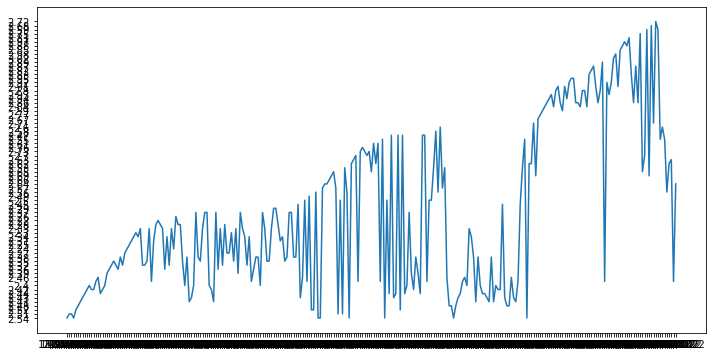

In [87]:
plt.figure(figsize=(12,6))
plt.plot(final['date'],final['T10YIE'])
plt.show()

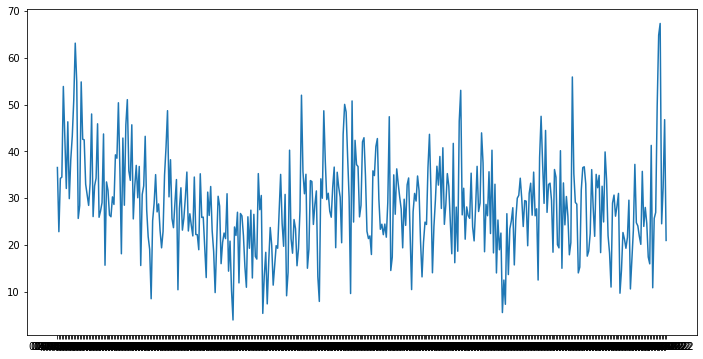

In [34]:
plt.figure(figsize=(12,6))
plt.plot(time_series['date'],time_series['sentiment_score'])
plt.show()

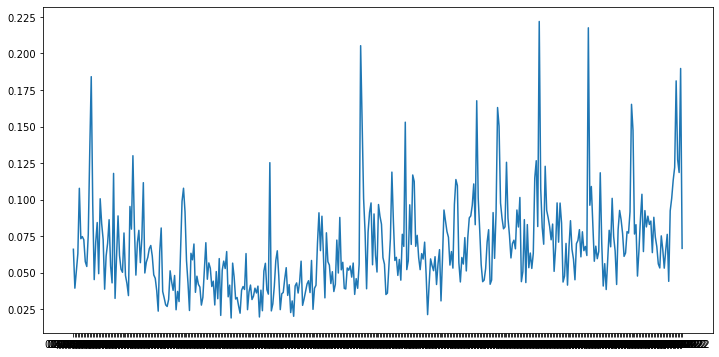

In [35]:
plt.figure(figsize=(12,6))
plt.plot(time_series['date'],time_series['attention_score'])
plt.show()

In [2]:
reddit = pd.read_csv("/Users/aashrit/Documents/Masters/MY498/Data/Reddit/reddit_text_processed.csv")
reddit

/Users/aashrit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8,9,10,19,68,74,75,76,77,78,79,80,88,89,90,92,93,94,95,98,99,100,101,103,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed,dup
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique
29580,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique
29581,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique
29582,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique


In [4]:
reddit.drop_duplicates()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,user_reports,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...
1,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:29+00:00,hello everyone a thing mention get prompt 1 al...
2,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:19+00:00,hello everyone a thing mention get prompt 1 al...
3,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove
4,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...
32477,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...
32478,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...
32479,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...


In [66]:
dup = 0

for i in range(1,len(reddit['selftext'])):
    if reddit.loc[i,'text_processed'] == reddit.loc[i-1,'text_processed']:
        reddit['dup'] = True
    else:
        reddit['dup'] = False
        
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed,dup
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,False
1,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:29+00:00,hello everyone a thing mention get prompt 1 al...,False
2,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:19+00:00,hello everyone a thing mention get prompt 1 al...,False
3,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,False
4,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,False
32477,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,False
32478,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,False
32479,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,False


In [67]:
duplicate_check = ['unique']

for i in range(1,len(reddit['selftext'])):
    #print(reddit.loc[i,'text_processed'])
    if reddit.loc[i,'text_processed'] == reddit.loc[i-1,'text_processed']:
        duplicate_check.append('duplicate')
    else:
        duplicate_check.append('unique')

duplicate_check

#Here, I check to see if consecutive rows contained identical info in the'text_processed' column
#This is as opposed to simply checking 'selftext' as people often copy and paste but could slightly change (e.g. copypastas)
#

['unique',
 'duplicate',
 'duplicate',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'duplicate',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 'unique',
 

In [68]:
len(duplicate_check)

32481

In [69]:
dup = 0

for i in duplicate_check:
    if i == 'duplicate':
        dup += 1
    
(dup/len(duplicate_check))*100

#Around 9% of Reddit posts were therefore duplicates but were posted at different times
#People often copy, paste, and repost as a joke - hence potential to skew my analysis
#Therefore these were removed

#When I used 'selftext' as opposed to 'text_processed' to check for duplicates, it yielded 7.77% duplicates
#Hence I prefer to use 'text_processed' to avoid keeping posts that are almost (but not completely) identical

8.919060373756965

In [70]:
reddit['dup'] = duplicate_check

In [71]:
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed,dup
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique
1,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:29+00:00,hello everyone a thing mention get prompt 1 al...,duplicate
2,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:19+00:00,hello everyone a thing mention get prompt 1 al...,duplicate
3,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique
4,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique
32477,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique
32478,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique
32479,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique


In [72]:
reddit.drop(reddit[reddit.dup == 'duplicate'].index, inplace=True)
#df.drop(df[df.score < 50].index, inplace=True)

In [76]:
reddit = reddit.iloc[:,1:]

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed,dup
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique
29580,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique
29581,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique
29582,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique


In [74]:
reddit = reddit.reset_index()

In [77]:
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,date,text_processed,dup
0,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:34:32+00:00,hello everyone a thing mention get prompt 1 al...,unique
1,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique
2,[],False,Drakinator123,NaN,[],NaN,text,t2_j93nh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:28:16+00:00,hello I m post look rp partner hot lewd fun fr...,unique
3,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique
4,[],False,thrallpt1,NaN,[],NaN,text,t2_68qkvgk5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-14 15:24:33+00:00,hello everyone a thing mention get prompt all ...,unique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique
29580,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique
29581,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique
29582,[],False,Thatonefluffyguy,NaN,[],NaN,text,t2_1opvtwsw,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01 00:18:03+00:00,hello yes the classic dynamic so tell incestuo...,unique


In [78]:
reddit.to_csv("reddit_text_processed.csv", index = False)

### Removing posts with weird words

In [1]:
#Gonna skew senti and attention values

In [5]:
reddit = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Reddit/reddit_text_processed_senti_attention.csv')

/Users/aashrit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8,9,10,19,68,69,74,75,76,77,78,79,80,88,89,90,92,93,94,95,98,99,100,101,103,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
reddit

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,promoted_by,promoted_display_name,promoted_url,created_at_utc.1,text_processed,dup,vader_score,attention_score,created_at,created
0,[],False,MaysonRytheli,NaN,[],NaN,text,t2_11bqmv,False,False,...,NaN,NaN,NaN,2022-06-14 15:30:15+00:00,remove,unique,0.0000,0.000000,2022-06-14 15:30:15+00:00,2022-06-14
1,[],True,Awkward-Landscape950,NaN,[],NaN,text,t2_eqd2hej9,False,False,...,NaN,NaN,NaN,2022-06-14 15:25:33+00:00,copper assault various risk threaten undermine...,unique,-0.9313,0.001401,2022-06-14 15:25:33+00:00,2022-06-14
2,[],False,christ_on_a_cracker_,NaN,[],NaN,text,t2_3nnp7pj8,False,False,...,NaN,NaN,NaN,2022-06-14 15:24:31+00:00,after employee college receive measly 275 rais...,unique,0.9300,0.002653,2022-06-14 15:24:31+00:00,2022-06-14
3,[],False,Pakisking,pk,"[{'a': ':Pakistan:', 'e': 'emoji', 'u': 'https...",:Pakistan: PK,richtext,t2_o08qpwaj,False,False,...,NaN,NaN,NaN,2022-06-14 15:23:24+00:00,in early post sub someone say take cause Franc...,unique,0.9325,0.000271,2022-06-14 15:23:24+00:00,2022-06-14
4,[],False,cobitos,NaN,[],NaN,text,t2_144n67,False,False,...,NaN,NaN,NaN,2022-06-14 15:20:40+00:00,whenever realtor say I cringe Fun fact interes...,unique,0.9536,0.001033,2022-06-14 15:20:40+00:00,2022-06-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24967,[],False,johnnydorko,Aged Acct,[],NaN,text,t2_b0dp74w,NaN,False,...,NaN,NaN,NaN,2021-05-01 02:40:42+00:00,just like home 5k 40 yr ago 11 million US valu...,unique,0.8020,0.004566,2021-05-01 02:40:42+00:00,2021-05-01
24968,[],False,sydneyfriendlycub,NaN,[],I am not a cat,text,t2_5anayvov,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:26:31+00:00,ampx200b hey everyone the crazy guy ampx200B W...,unique,0.9817,0.000303,2021-05-01 01:26:31+00:00,2021-05-01
24969,[],False,subreddit_stats,NaN,[],NaN,text,t2_59b2c,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:04:20+00:00,period 697 day submissionscomment _ _ total__9...,unique,0.9993,0.000032,2021-05-01 01:04:20+00:00,2021-05-01
24970,[],False,jrochling,NaN,[],NaN,text,t2_82wuszrn,NaN,False,...,NaN,NaN,NaN,2021-05-01 01:00:06+00:00,what percentage stock market non PSLV vs silve...,unique,0.6597,0.007576,2021-05-01 01:00:06+00:00,2021-05-01


In [7]:
#Finds the index of all posts containing any of the words highlighted in line 5 which are clearly not relevant
to_drop = []

for i in range(len(reddit)):
    if ' cum ' in reddit['text_processed'][i] or ' vagina ' in reddit['text_processed'][i] or ' penis ' in reddit['text_processed'][i] or ' vaginal ' in reddit['text_processed'][i] or ' sex ' in reddit['text_processed'][i] or ' clit ' in reddit['text_processed'][i] or ' sexually ' in reddit['text_processed'][i] or ' breast ' in reddit['text_processed'][i] or ' orgasm ' in reddit['text_processed'][i] or ' sperm ' in reddit['text_processed'][i] or ' porn ' in reddit['text_processed'][i]:
        to_drop.append(i)
        
to_drop

[158,
 1069,
 1391,
 2228,
 2229,
 2230,
 2559,
 2940,
 3040,
 3073,
 3207,
 3208,
 3211,
 3895,
 4213,
 4370,
 4891,
 5115,
 6133,
 6135,
 6145,
 6309,
 6642,
 6669,
 6907,
 6999,
 7096,
 7772,
 7901,
 8002,
 8111,
 8144,
 8461,
 8553,
 8624,
 8706,
 8713,
 8794,
 9201,
 9735,
 10033,
 10096,
 10433,
 10487,
 10659,
 11003,
 11087,
 11171,
 11251,
 11372,
 11394,
 11539,
 11906,
 11966,
 12362,
 12784,
 12904,
 13169,
 13556,
 13597,
 14155,
 14828,
 14845,
 14940,
 14957,
 15078,
 15149,
 15155,
 15616,
 15617,
 15659,
 16055,
 16085,
 16465,
 16466,
 16467,
 16468,
 16540,
 16732,
 16733,
 16800,
 16802,
 16822,
 16918,
 16997,
 17158,
 17394,
 17730,
 17878,
 18023,
 18098,
 18417,
 18565,
 18580,
 18863,
 18870,
 19218,
 19220,
 19222,
 19552,
 19944,
 19953,
 20197,
 20199,
 20682,
 20813,
 21225,
 21508,
 21611,
 21835,
 21952,
 22299,
 22306,
 22490,
 22718,
 22748,
 22936,
 23289,
 23380,
 23401,
 24058,
 24845,
 24857,
 24933]

In [8]:
len(to_drop)
#Doing this drops 4735 posts

124

In [10]:
reddit = reddit.drop(to_drop, axis=0)

In [11]:
reddit = reddit.reset_index()

In [12]:
reddit = reddit.iloc[:,1:]

In [13]:
reddit.to_csv("reddit_text_processed_senti_attention.csv", index = False)

In [14]:
29583-4735

24848

In [16]:
24848+60061
60061/24848

2.4171361880231808